# HW4 - Q(9.3,10.4,11.3)

# Q9

# 9.3.a

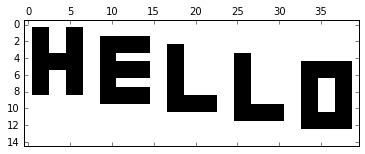

In [5]:
%matplotlib inline
from numpy import ones, zeros, linalg, dot
import matplotlib.pylab as plt

def blocks():
    block = ones((8,6))
    return block

def print_Hello(Out,A,B,C,D,E):
    Out[1:9,1:7]    = A
    Out[2:10,9:15]  = B
    Out[3:11,17:23] = C
    Out[4:12,25:31] = D
    Out[5:13,33:39] = E
    return Out

Z = zeros((15,40))

H = blocks()
H[0:3,2:4] = 0
H[5:8,2:4] = 0

E = blocks()
E[2:3,2:6] = 0
E[5:6,2:6] = 0

L = blocks()
L[0:6,2:6] = 0

O = blocks()
O[2:6,2:4] = 0

Hello = print_Hello(Z,H,E,L,L,O)
plt.spy(Hello)
plt.show()

# 9.3.b

Rank of matrix is = 10
10.3832691272
5.13177886451
3.18775603322
2.93826394576
2.06251516862
1.83760005749
1.22698575147
0.987917872559
0.737985369404
0.632884998878
5.77976000022e-16
2.58167644146e-16
0.0
0.0
0.0


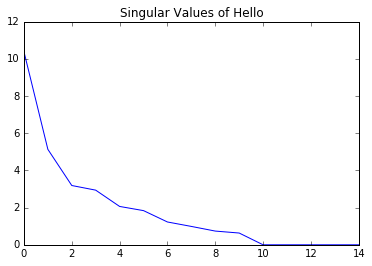

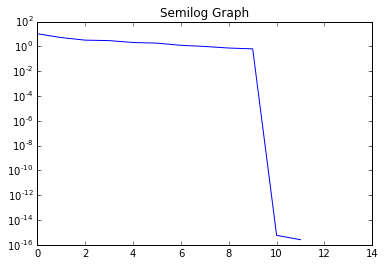

In [6]:
print "Rank of matrix is =",
print linalg.matrix_rank(Hello)
S,v,D = linalg.svd(Hello)
for i in range(15):
    print v[i]

plt.plot(v)
plt.title('Singular Values of Hello')
plt.show()

plt.semilogy(v)
plt.title('Semilog Graph')
plt.show()

# 9.3.c

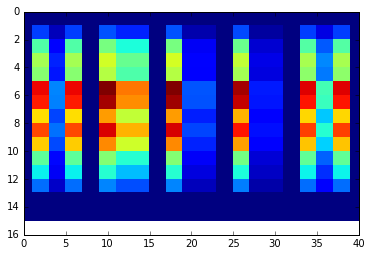

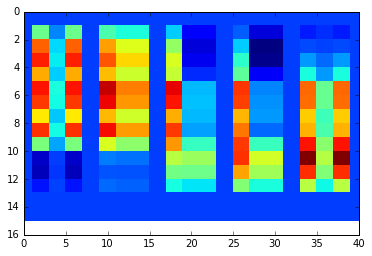

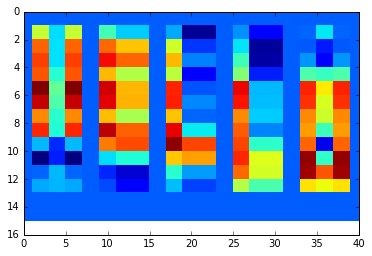

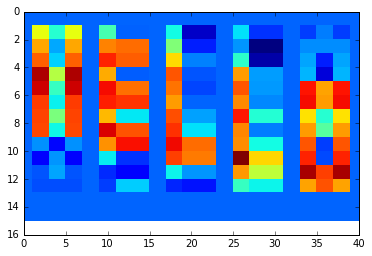

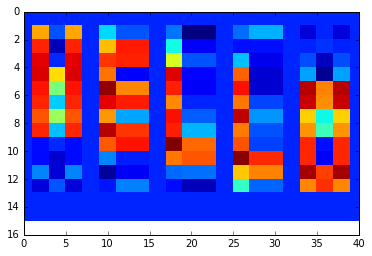

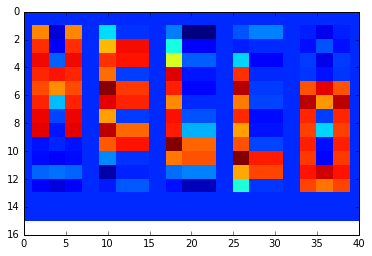

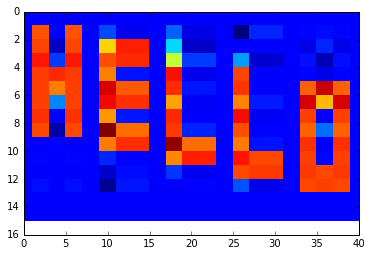

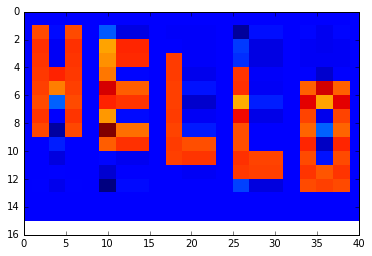

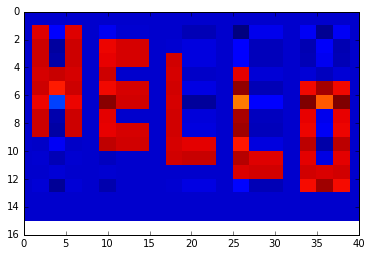

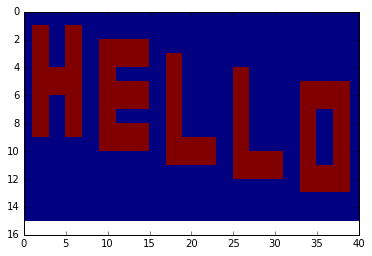

In [7]:
V = zeros((15,40))
for i in range(10):
    V[i,i] = v[i]
    B = dot(dot(S,V),D)
    plt.pcolor(B)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.show()

# Q10.4

# 10.4.a

In [1]:
from numpy import *

teta = pi/6
F = [[-1*cos(teta),sin(teta)], [sin(teta),cos(teta)]]
J = [[cos(teta),sin(teta)], [-1*sin(teta),cos(teta)]]

out = linalg.solve(J,F)
print out

[[ -1.00000000e+00   0.00000000e+00]
 [  2.98569296e-17   1.00000000e+00]]


# 10.4.b

In [2]:
from numpy import *

def givens(A):
    m = shape(A)[0]
    n = shape(A)[1]
    Q = eye((m))
    for j in range(n):
        for i in reversed(range(j,m-1)):
            c = 1.0 * A[i][j] / sqrt((A[i][j])**2 + (A[i+1][j])**2)
            s = 1.0 * A[i+1][j] / sqrt((A[i][j])**2 + (A[i+1][j])**2)
            G = identity((m))
            G[i][i] = c
            G[i][i+1] = s
            G[i+1][i] = -s
            G[i+1][i+1] = c
            A = dot(G,A)
            Q = dot(G,Q)
    Q = transpose(Q)
    return Q, A

A = 10*random.random((3,3))
print "The random A matrix is:"
print A
print
Q, R = givens(A)
print "The Q matrix after Givens-QR factorization is:"
print Q
print
print "The R matrix after Givens-QR factorization is:"
print R
print
print "The A matrix that get from QR defactorization is:"
print dot(Q,R)


The random A matrix is:
[[ 1.18803863  4.24031373  0.52601064]
 [ 5.18521001  7.1290045   5.48957291]
 [ 4.47097439  5.28940449  5.38006783]]

The Q matrix after Givens-QR factorization is:
[[ 0.17096745  0.95724248 -0.23336016]
 [ 0.74618963  0.02886979  0.66510718]
 [ 0.64340591 -0.28784261 -0.70934862]]

The R matrix after Givens-QR factorization is:
[[  6.94891723e+00   9.44777897e+00   7.64776053e+00]
 [  1.14477705e-16   2.74230526e+00  -8.86610259e-01]
 [  4.69587098e-16   1.26941111e-17  -2.87939262e-01]]

The A matrix that get from QR defactorization is:
[[ 1.18803863  4.24031373  0.52601064]
 [ 5.18521001  7.1290045   5.48957291]
 [ 4.47097439  5.28940449  5.38006783]]


# Q11.3

In [4]:
from numpy import *

def vector():
    t = transpose(linspace(0.0, 1.0, 50))
    b = cos(4*t)
    X = fliplr(vander(t))
    A = X[0:50, 0:12]
    return A, b

def mgs(A, m, n):
    V = zeros((m, n))
    Q = zeros((m, n))
    R = zeros((n, n))
    for i in range(n):
        V[:,i] = A[:,i]
    for i in range(n):
        R[i,i] = linalg.norm(V[:,i])
        Q[:,i] = V[:,i]/R[i,i]
        for j in range(i+1,n,1):
            R[i,j] = inner(Q[:,i], V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    return Q, R

def house(A, m, n):
    W = zeros((m, n))
    R = zeros((m, n))
    R[0:m, 0:n] = A[0:m, 0:n]
    for k in range(n):
        X = zeros((m-k))
        X[0:m-k] = R[k:m, k]
        s = sign(X[0])
        V = X
        V[0]=s*linalg.norm(X) + V[0]
        V = V/linalg.norm(V)
        W[k:m,k] = V
        R[k:m,k:n] = R[k:m,k:n] - 2*outer(V, dot(transpose(V), R[k:m,k:n]));
    R = R[0:n, 0:n]
    return W, R

def formQ(W, m, n):
    Q = eye((m))
    for j in range(m):
        for k in reversed(range(n)):
            Q[k:m,j] = Q[k:m,j] - 2*W[k:m,k]*(dot(transpose(W[k:m,k]), Q[k:m,j]));
    return Q

m = 50
n = 12

A, b = vector()
xa = linalg.solve(dot(transpose(A),A),dot(transpose(A),b))
print "Result of part A: ((A'*A)\(A'*b))"
print xa
norma = linalg.norm(dot(A,xa)-b)
print "Least square error is =",
print norma
print

A, b = vector()
Q, R = mgs(A,m,n)
xb = linalg.solve(R,dot(transpose(Q), b))
print "Result of part B: (Modified Gram-Schmidt Method)"
print xb
normb = linalg.norm(dot(A, xb) - b)
print "Least square error is =",
print normb
print

A, b = vector()
W, R = house(A, m, n)
Q = formQ(W, m, n)
Q = Q[:, 0:12]
xc = linalg.solve(R, dot(transpose(Q), b))
print "Result of part C: (Householder Triangularization)"
print xc
normc = linalg.norm(dot(A, xc) - b)
print "Least square error is =",
print normc
print

A, b = vector()
Q, R = linalg.qr(A)
xd = linalg.solve(R, dot(transpose(Q), b))
print "Result of part D: (Python Predefined QR Decomposition)"
print xd
normd = linalg.norm(dot(A, xd) - b)
print "Least square error is =",
print normd
print

A, b = vector()
xee = linalg.lstsq(A, b)
xe = xee[0]
print "Result of part E: (A\b)"
print xe
norme = linalg.norm(dot(A, xe)- b)
print "Least square error is =",
print norme
print

A, b = vector()
S, v, D = linalg.svd(A)
S = S[0:50, 0:12]
V = zeros((12, 12))
for i in range(12):
    V[i,i] = v[i]
xf = dot(transpose(D), linalg.solve(V, dot(transpose(S), b)))
print "Result of part F: (Python Predefined SVD Decomposition)"
print xf
normf = linalg.norm(dot(A, xf) - b)
print "Least square error is =",
print normf


Result of part A: ((A'*A)\(A'*b))
[  9.99999996e-01   1.12622646e-06  -8.00004135e+00   5.87994007e-04
   1.06623616e+01   1.85549596e-02  -5.73999502e+00   9.66146801e-02
   1.48866123e+00   1.58052882e-01  -4.38068629e-01   9.96269532e-02]
Least square error is = 2.8462479086e-08

Result of part B: (Modified Gram-Schmidt Method)
[  1.00000000e+00  -6.73243836e-07  -7.99997176e+00  -4.59211033e-04
   1.06705109e+01  -1.87127287e-02  -5.63316014e+00  -1.00869974e-01
   1.72387227e+00  -1.62931849e-02  -3.64913514e-01   8.63544316e-02]
Least square error is = 8.94557185179e-09

Result of part C: (Householder Triangularization)
[  1.00000000e+00  -4.22743480e-07  -7.99998124e+00  -3.18763440e-04
   1.06694308e+01  -1.38202940e-02  -5.64707561e+00  -7.53160518e-02
   1.69360699e+00   6.03208706e-03  -3.74241695e-01   8.80405745e-02]
Least square error is = 7.99915491733e-09

Result of part D: (Python Predefined QR Decomposition)
[  1.00000000e+00  -4.22742758e-07  -7.99998124e+00  -3.1876

The last 4 operations gives the best results. Modified-Gram Schmidt results not as good as last 4 ones but better than classical (A'*A)\(A'*b) calculation.